# 7.6.MobileNetV2_from_Scratch_training_all_labels_with_aug_150_epochs

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Creando el modelo

In [2]:
#!pip install sklearn
#!pip install imutils

In [3]:
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from imutils import paths
import numpy as np
import os

In [4]:
img_size = 224
path_train = 'data_' + str(img_size) + '/train'
path_validation = 'data_' + str(img_size) + '/validation'
path_checkpoints = 'checkpoint_MobileNetV2'

In [5]:
imagePaths_train = list(paths.list_images(path_train))
imagePaths_validation = list(paths.list_images(path_validation))
classNames = [pt.split(os.path.sep)[-2] for pt in imagePaths_train]
classNames = [str(x) for x in np.unique(classNames)]

print("etiquetas del entrenamiento")
print(classNames)

#Códificando las etiquetas en númerops
print("codificando etiquetas")
le = LabelEncoder()
classNames_ids = le.fit_transform(classNames)
print(classNames_ids)

etiquetas del entrenamiento
['10', '100', '20', '200', '50']
codificando etiquetas
[0 1 2 3 4]


In [6]:
input_shape = (img_size, img_size, 3)
base_model = MobileNetV2(
                    #include_top=True,
                    include_top=False,
                    #weights=None,
                    weights='imagenet',
                    input_shape=input_shape,
                    #pooling='max',
                    #classes=len(classNames_ids),
                    #classifier_activation='softmax'
                   )

In [7]:
for layer in base_model.layers:
    layer.trainable = True

In [8]:
model = tf.keras.Sequential([base_model,
                             Flatten(),
                             Dense(len(classNames_ids), activation='softmax')
                            ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 2,537,477
Non-trainable params: 34,112
_________________________________________________________________


# Entrenamiento

In [10]:
batch_size = 64

In [11]:
generator = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = generator.flow_from_directory(path_train,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                subset='training')
validation_generator = generator.flow_from_directory(path_train,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                subset='validation')

Found 19644 images belonging to 5 classes.
Found 4911 images belonging to 5 classes.


In [20]:
optimizer = SGD(learning_rate=0.0001)
#optimizer = SGD(learning_rate=0.0001, momentum=0.9)

loss = 'categorical_crossentropy'
metrics=["accuracy"]

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

In [21]:
fname = os.path.sep.join([path_checkpoints, 
                          'epoch-{epoch:03d}-val_loss:{val_loss:.6f}-val_accuracy:{val_accuracy:.6f}.hdf5'])
checkpoint = ModelCheckpoint(fname,
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)
callbacks = [checkpoint]
#callbacks = []

In [22]:
# load weigths
better_checkpoint = 'all_labels_with_aug/epoch-518-val_loss:0.005229-val_accuracy:0.998575.hdf5'
model.load_weights(path_checkpoints + '/' + better_checkpoint)

In [31]:
epochs = 130

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              validation_data=validation_generator,
                              epochs = epochs,
                              callbacks=callbacks,
                              verbose = 1)

Epoch 1/130
307/307 [==============================] - ETA: 0s - loss: 2.7972e-05 - accuracy: 1.0000
Epoch 00001: val_loss did not improve from 0.00523
307/307 [==============================] - 83s 269ms/step - loss: 2.7972e-05 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 2/130
307/307 [==============================] - ETA: 0s - loss: 1.9769e-05 - accuracy: 1.0000
Epoch 00002: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 1.9769e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 3/130
307/307 [==============================] - ETA: 0s - loss: 2.4958e-05 - accuracy: 1.0000
Epoch 00003: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.4958e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 4/130
307/307 [==============================] - ETA: 0s - loss: 1.8094e-05 - accuracy: 1.0000
Epoch 00004: val_loss did not

307/307 [==============================] - ETA: 0s - loss: 2.6084e-05 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.6084e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 29/130
307/307 [==============================] - ETA: 0s - loss: 2.2210e-05 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.2210e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 30/130
307/307 [==============================] - ETA: 0s - loss: 1.9777e-05 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.00523
307/307 [==============================] - 83s 269ms/step - loss: 1.9777e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 31/130
307/307 [==============================] - ETA: 0s - loss: 2.7875e-05 - accuracy: 1.0000
Epoch 00031: val_loss did not improve 

307/307 [==============================] - ETA: 0s - loss: 4.3925e-05 - accuracy: 1.0000
Epoch 00056: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 4.3925e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 57/130
307/307 [==============================] - ETA: 0s - loss: 2.2381e-05 - accuracy: 1.0000
Epoch 00057: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.2381e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 58/130
307/307 [==============================] - ETA: 0s - loss: 2.4370e-05 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.4370e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 59/130
307/307 [==============================] - ETA: 0s - loss: 3.7332e-05 - accuracy: 1.0000
Epoch 00059: val_loss did not improve 

307/307 [==============================] - ETA: 0s - loss: 2.0047e-05 - accuracy: 1.0000
Epoch 00084: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.0047e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 85/130
307/307 [==============================] - ETA: 0s - loss: 2.0629e-05 - accuracy: 1.0000
Epoch 00085: val_loss did not improve from 0.00523
307/307 [==============================] - 83s 269ms/step - loss: 2.0629e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 86/130
307/307 [==============================] - ETA: 0s - loss: 2.6118e-05 - accuracy: 1.0000
Epoch 00086: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 268ms/step - loss: 2.6118e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9986
Epoch 87/130
307/307 [==============================] - ETA: 0s - loss: 1.9388e-05 - accuracy: 1.0000
Epoch 00087: val_loss did not improve 

307/307 [==============================] - ETA: 0s - loss: 2.4088e-05 - accuracy: 1.0000
Epoch 00112: val_loss did not improve from 0.00523
307/307 [==============================] - 83s 269ms/step - loss: 2.4088e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9986
Epoch 113/130
307/307 [==============================] - ETA: 0s - loss: 2.3508e-05 - accuracy: 1.0000
Epoch 00113: val_loss did not improve from 0.00523
307/307 [==============================] - 83s 269ms/step - loss: 2.3508e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9986
Epoch 114/130
307/307 [==============================] - ETA: 0s - loss: 2.3605e-05 - accuracy: 1.0000
Epoch 00114: val_loss did not improve from 0.00523
307/307 [==============================] - 82s 269ms/step - loss: 2.3605e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9986
Epoch 115/130
307/307 [==============================] - ETA: 0s - loss: 2.6825e-05 - accuracy: 1.0000
Epoch 00115: val_loss did not impro

# Gráfica

In [32]:
import matplotlib.pyplot as plt

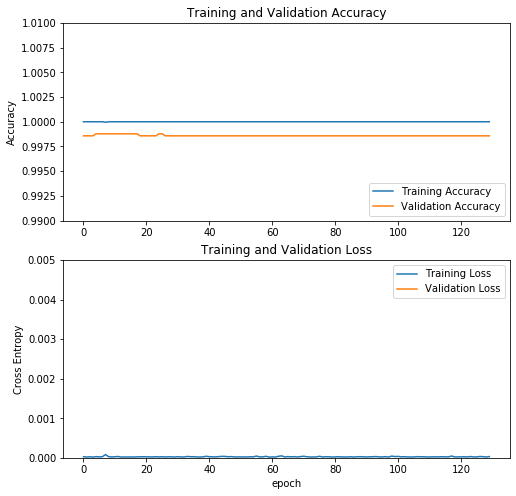

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.ylim([0.99,1.01])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.ylim([0, 0.005])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Testing model

In [34]:
from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader

import matplotlib.pyplot as plt

In [35]:
models = [model]

INFO:tensorflow:Load image with size: 2671, num_label: 5, labels: 10, 100, 20, 200, 50.


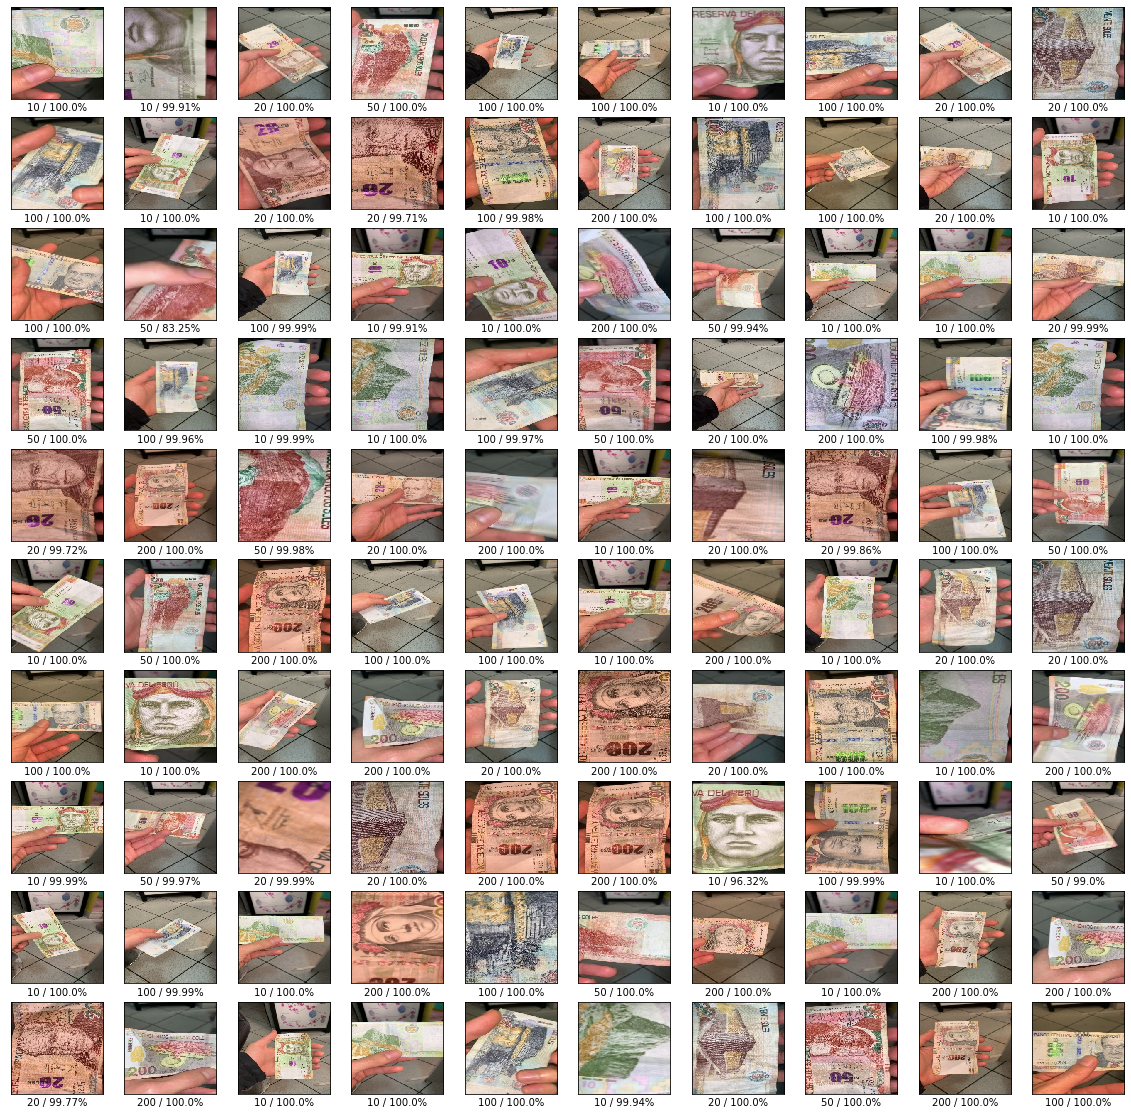

In [36]:
test_data = ImageClassifierDataLoader.from_folder(path_validation)

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(test_data.dataset.take(100)):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)

    #predict
    #swapped = np.moveaxis(image, 0, 1)
    #arr4d = np.expand_dims(swapped, 0)
    
    image = img_to_array(image)
    image = preprocess_input(image)
    arr4d = np.expand_dims(image, axis=0)
    
    #utilizando el average de los modelos para la predicción
    predictions = []
    #counter = 0
    for model in models:
        #if counter == 0:
        #    print('==========')
        #if counter > 2:
        #    counter = 0
        #print(np.argmax(model.predict(arr4d)))
        #print(classNames[np.argmax(model.predict(arr4d))])
        predictions.append(model.predict(arr4d))
        #counter += 1
    #print(predictions)
    #print('==')
    prediction_average = np.average(predictions, axis=0)
    id_predict = np.argmax(prediction_average)
    percentage = round(prediction_average[0][id_predict] * 100, 2)
    predict_label = classNames[id_predict]
    
    #print(prediction_average * 100)
    #print(id_predict)
    #print('==============')
    
    #setup color
    color = get_label_color(predict_label, test_data.index_to_label[label.numpy()])
    ax.xaxis.label.set_color(color)
    image_label = predict_label + ' / ' + str(percentage) + '%'
    plt.xlabel(image_label)
plt.show()